In [2]:
#import the modules

import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df = pds.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
df.shape

(200, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
df.drop(columns="Unnamed: 0",inplace= True)

In [19]:
#describing the data with some basic analysis like mean , max,min ,std,etc
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
#corelation among the entities
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


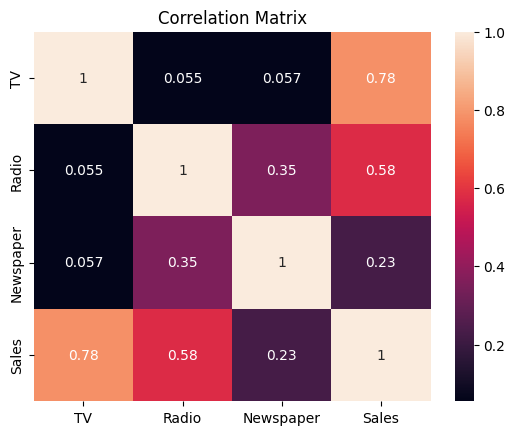

In [29]:
#correlation matrix
mat = df.corr()
sns.heatmap(mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

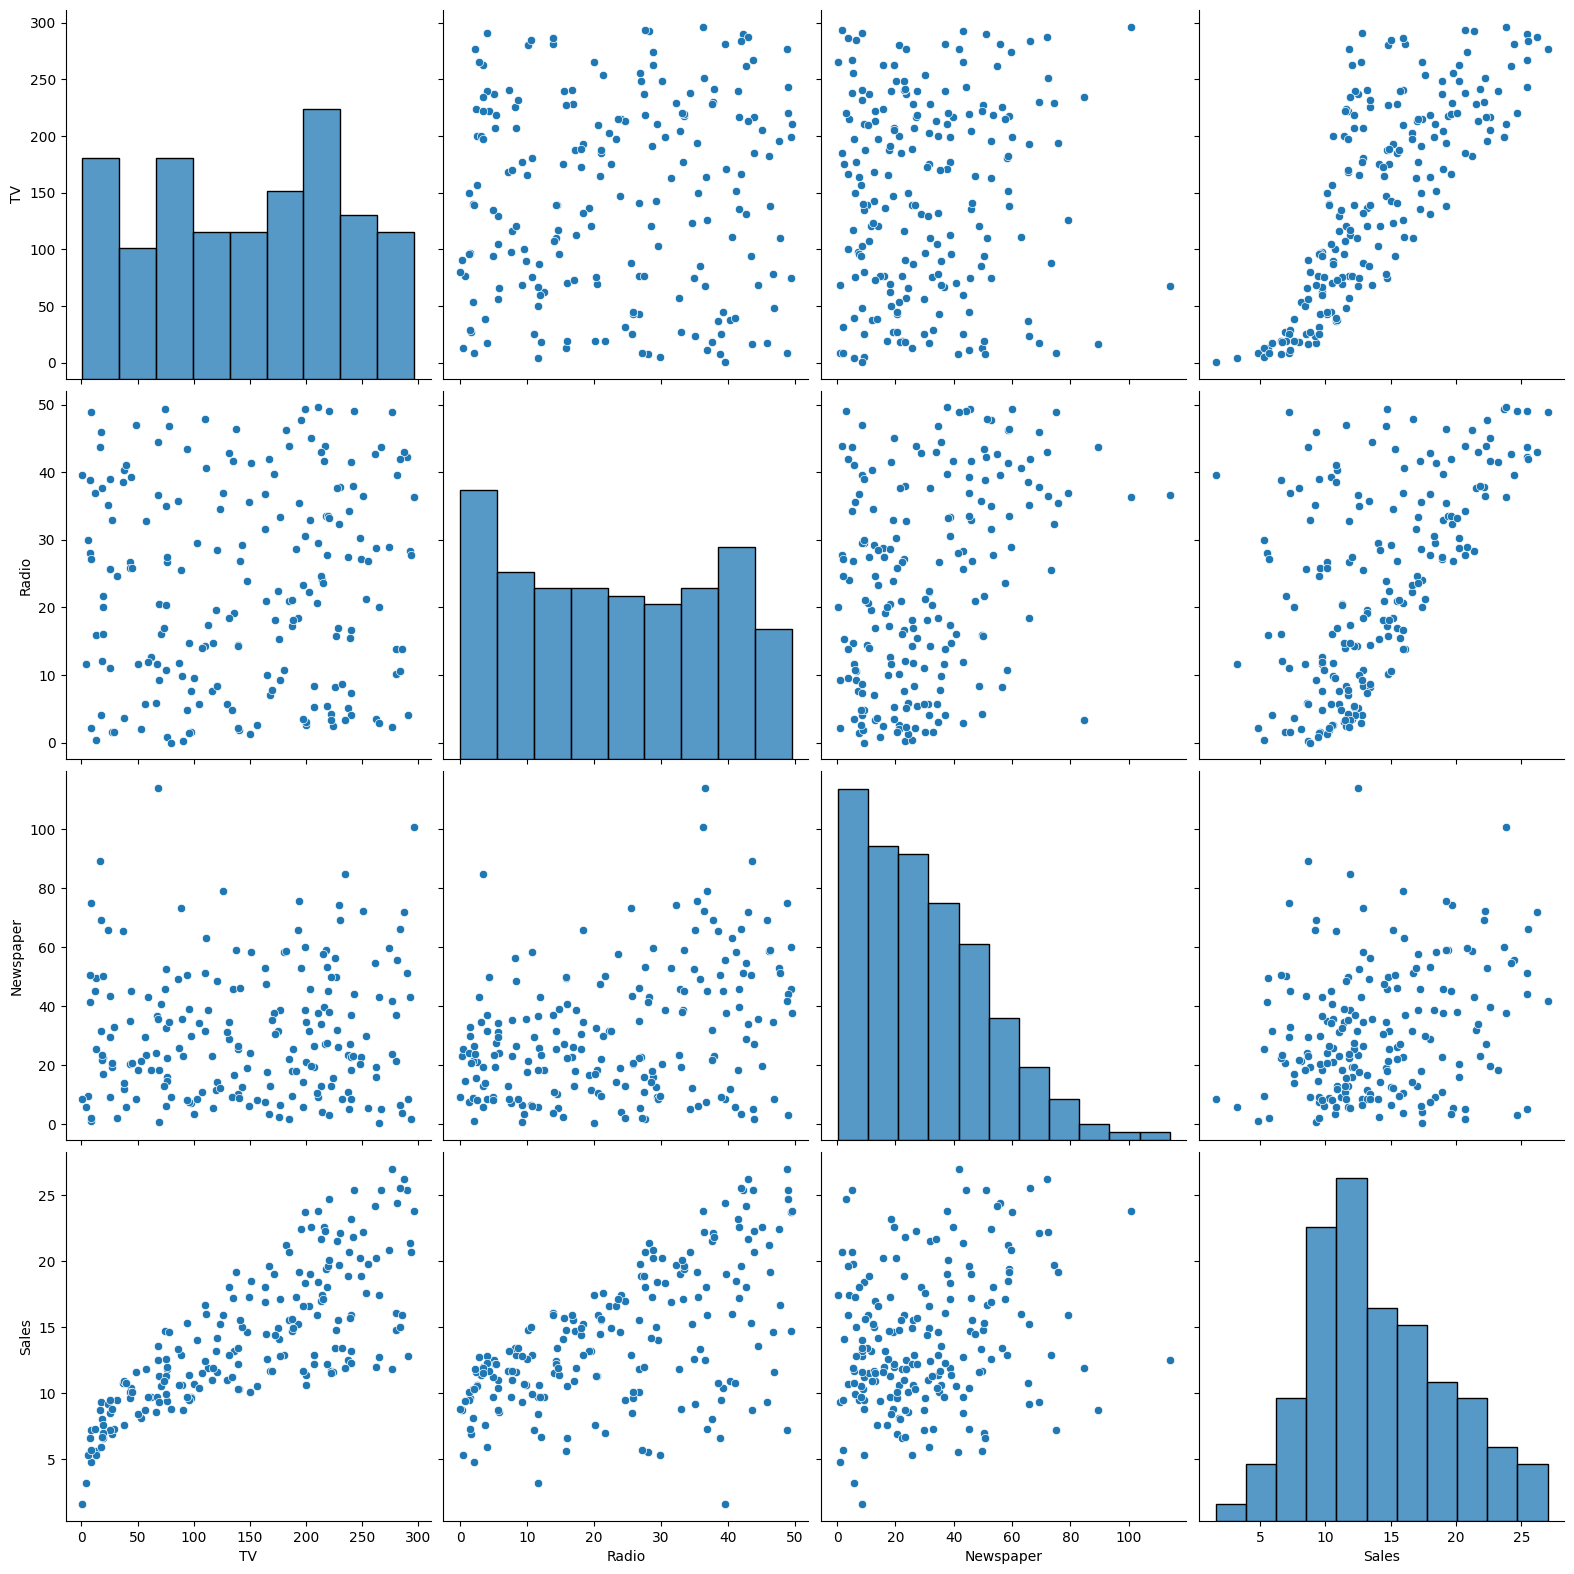

In [30]:
sns.pairplot(df,height=4)

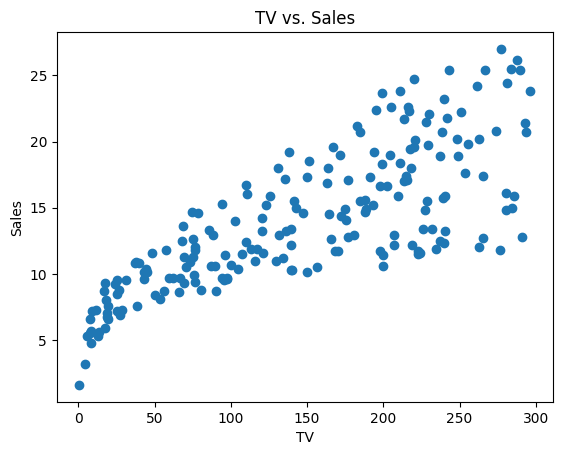

In [31]:
#lets see only Tv vs sales
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs. Sales')
plt.show()


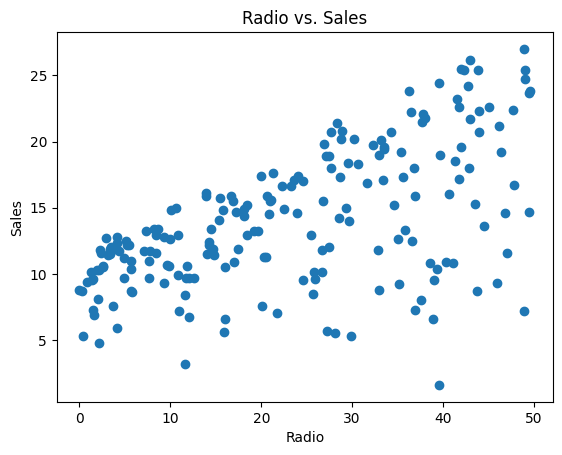

In [32]:
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs. Sales')
plt.show()

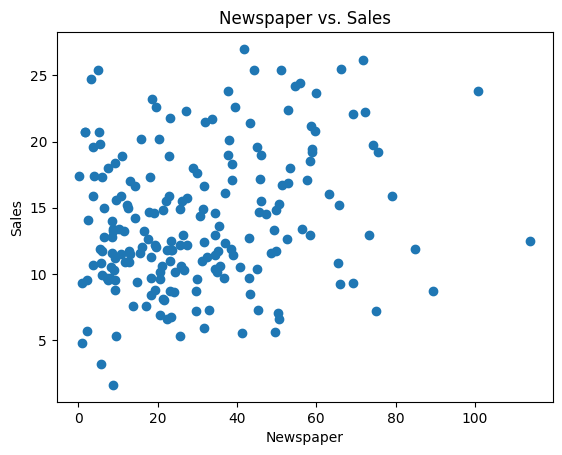

In [33]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs. Sales')
plt.show()

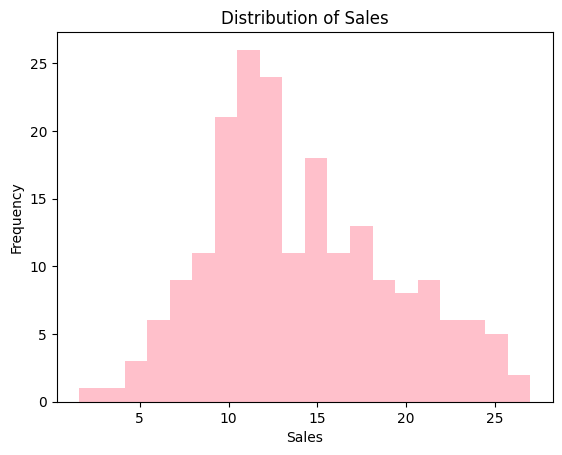

In [34]:
#for sales we will plot histogram
plt.hist(df['Sales'], bins=20,color='pink')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


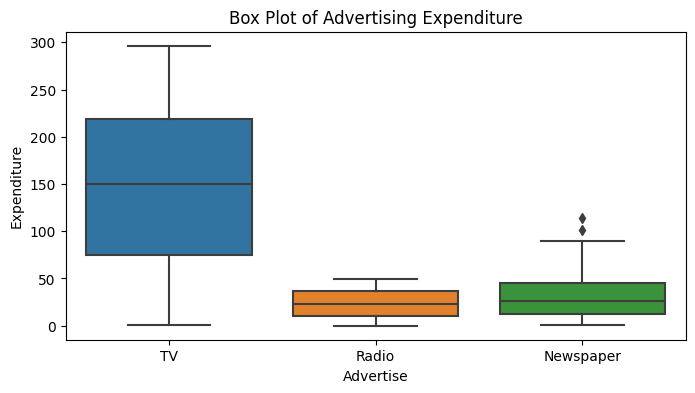

In [35]:
#boxplot of advertising expenditure

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.xlabel('Advertise')
plt.ylabel('Expenditure')
plt.title('Box Plot of Advertising Expenditure')
plt.show()


Training and testing the data 

In [36]:
#import modules needed for model train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.drop(columns = "Sales")
y = df["Sales"]

In [38]:

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [39]:
X_train.shape

(160, 3)

In [40]:
X_test.shape

(40, 3)

In [41]:
X_train

,TV,Radio,Newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4
...,...,...,...
104,238.2,34.3,5.3
129,59.6,12.0,43.1
183,287.6,43.0,71.8
174,222.4,3.4,13.1


In [43]:
Y_train

26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
       ... 
104    20.7
129     9.7
183    26.2
174    11.5
122    11.6
Name: Sales, Length: 160, dtype: float64

In [44]:
X_test

,TV,Radio,Newspaper
11,214.7,24.0,4.0
99,135.2,41.7,45.9
128,220.3,49.0,3.2
175,276.9,48.9,41.8
1,44.5,39.3,45.1
111,241.7,38.0,23.2
90,134.3,4.9,9.3
177,170.2,7.8,35.2
88,88.3,25.5,73.4
187,191.1,28.7,18.2


In [45]:
#Linear Regression
mod = LinearRegression()
mod.fit(X_train,Y_train)

LinearRegression()

In [49]:
#Accuracy Scores
from sklearn.metrics import r2_score


In [50]:
#Training data accuracy 
pre_train = mod.predict(X_train)
train_acc = r2_score(Y_train,pre_train)
print("Training data metrics")
print("r2_score :",train_acc)


Training data metrics
r2_score : 0.8911672911176578


In [51]:
#Training data accuracy 
pre_test = mod.predict(X_test)
test_acc = r2_score(Y_test,pre_test)
print("Testing data metrics")
print("r2_score : ",test_acc)

Testing data metrics
r2_score :  0.9085774752313167


Evaluating the model

In [58]:

inp = [166.8,42,3.6]
inp = np.asarray(inp)
inp = inp.reshape(1,-1)
predict = mod.predict(inp)
print("Prediction:" ,predict[0])

Prediction: 18.25326777736165
